In [1]:
# data_augmentation.py

import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Create an instance of ImageDataGenerator with specified augmentations
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True)

def feature_engineering_and_augmentation(path, img_size=(224, 224)):
    labels = []
    original_images = []
    augmented_images = []
    shape_types = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
    
    for shape in shape_types:
        print(f'Loading {shape} images...')
        shape_dir = os.path.join(path, shape)
        if not os.path.exists(shape_dir):
            print(f"Directory {shape_dir} does not exist.")
            continue
        for imgName in os.listdir(shape_dir):
            img_path = os.path.join(shape_dir, imgName)
            if not os.path.isfile(img_path):
                print(f"File {img_path} does not exist.")
                continue
            img = cv2.imread(img_path)
            if img is None:
                print(f"Image {img_path} could not be read.")
                continue
            # Resize image to the desired size (224, 224)
            img = cv2.resize(img, img_size)
            # Normalize image to range [0, 1]
            img = img.astype('float32') / 255.0
            original_images.append(img)
            labels.append(shape_types.index(shape))

            # Augment the images
            img_expanded = np.expand_dims(img, axis=0)  # Prepare the image for the generator
            augmented_iter = datagen.flow(img_expanded, batch_size=1)
            augmented_img = next(augmented_iter)[0]  # Get the augmented image
            augmented_images.append(augmented_img)

    # Convert lists to numpy arrays
    original_images = np.array(original_images)
    augmented_images = np.array(augmented_images)
    labels = to_categorical(labels, num_classes=len(shape_types))

    print(f"Original images count: {len(original_images)}")
    print(f"Augmented images count: {len(augmented_images)}")
    print(f"Labels count: {len(labels)}")

    return original_images, augmented_images, labels


Loading Heart images...
Loading Oblong images...
Loading Oval images...
Loading Round images...
Loading Square images...
Original images count: 50
Augmented images count: 50
Labels count: 50
Function returned: 50 original images, 50 augmented images, 50 labels.


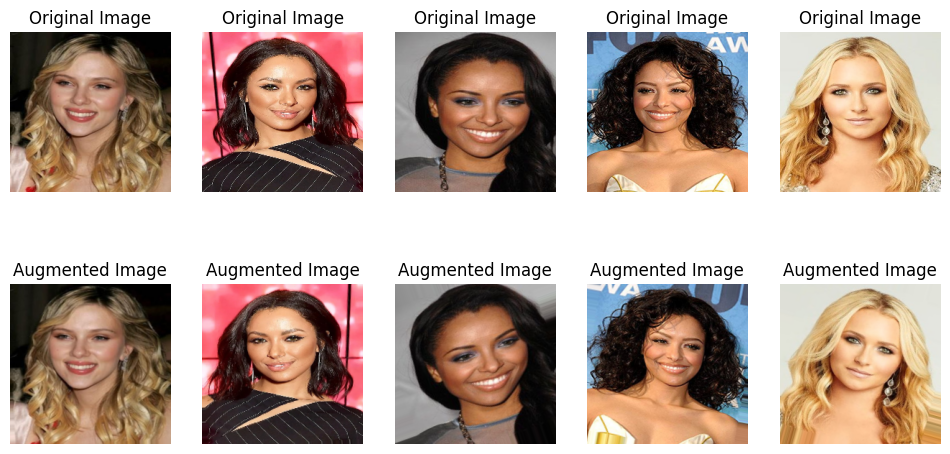

In [9]:
# data_augmentation.ipynb

# Import the function from the Python script
from data_augmentation import feature_engineering_and_augmentation

# Example directory (replace this with your actual directory)
dir_train = "./sample"

# Load and augment the training dataset
try:
    original_images, augmented_images, y_train = feature_engineering_and_augmentation(dir_train)
    print(f"Function returned: {len(original_images)} original images, {len(augmented_images)} augmented images, {y_train.shape[0]} labels.")
except Exception as e:
    print(f"Error: {e}")

# Display an example of the original and augmented data
import matplotlib.pyplot as plt
import cv2  # Ensure cv2 is imported for image conversion

# Define a function to convert BGR to RGB for matplotlib
def convert_to_rgb(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot a few original and augmented images
plt.figure(figsize=(12, 6))

for i in range(5):
    # Original images
    plt.subplot(2, 5, i+1)
    plt.imshow(convert_to_rgb(original_images[i]))
    plt.title("Original Image")
    plt.axis('off')

    # Augmented images
    plt.subplot(2, 5, i+6)
    plt.imshow(convert_to_rgb(augmented_images[i]))
    plt.title("Augmented Image")
    plt.axis('off')

plt.show()
